In [59]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv('assets/tv_shows.csv',encoding='utf-8')

In [4]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [5]:
df.describe()

,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.0
mean,2683.500000,2814.945790,2012.628726,0.367176,0.301975,0.341095,0.065387,1.0
std,1549.752453,1672.385727,10.142813,0.482080,0.459157,0.474122,0.247231,0.0
min,0.000000,1.000000,1904.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1341.750000,1345.750000,2011.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2683.500000,2788.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4025.250000,4308.250000,2018.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,5367.000000,5717.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [6]:
df.shape

(5368, 12)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')

In [77]:
#Drop columns not needed
df.drop(columns=['Unnamed: 0','Type'],inplace=True)

In [78]:
#For each year how many movies were released overall
df['Year'].value_counts()

2017    605
2018    562
2019    500
2020    489
2016    486
       ... 
1943      1
1932      1
1947      1
1904      1
1945      1
Name: Year, Length: 78, dtype: int64

In [79]:
#Get the top 10 shows by IMDB Rating across streaming platforms
df.sort_values(by='IMDb',ascending=False).head(10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
3802,4054,The Secret World of Nature: Spain,2020,7+,9.6/10,51/100,0,0,1,0
5077,5401,Bluey,2018,all,9.6/10,71/100,0,0,0,1
3611,3818,Malgudi Days,1987,all,9.5/10,62/100,0,0,1,0
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
5277,5623,Alaska Animal Rescue,2020,NaN,9.4/10,42/100,0,0,0,1
80,81,Our Planet,2019,all,9.3/10,82/100,1,0,0,0
3115,3246,Hungry Henry,2014,NaN,9.3/10,39/100,0,1,0,0
3760,4003,Everyday Driver,2017,NaN,9.3/10,52/100,0,0,1,0
2009,2034,Cosmos,2014,all,9.3/10,82/100,0,1,1,1
5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0


In [80]:
#Get the top 10 shows for each streaming platform by IMDB rating 

for a in ('Netflix','Prime Video','Hulu','Disney+'):
    print ('Platform: ' + str(a)) 
    display( df[df[a]==1].sort_values(by='IMDb',ascending=False).head(10))
    

Platform: Netflix


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0
80,81,Our Planet,2019,all,9.3/10,82/100,1,0,0,0
25,26,Fullmetal Alchemist: Brotherhood,2009,16+,9.1/10,88/100,1,1,0,0
349,351,Reply 1988,2015,NaN,9.1/10,67/100,1,0,0,0
401,403,My Mister,2018,NaN,9.1/10,66/100,1,0,0,0
450,452,Word of Honor,2021,NaN,9.1/10,65/100,1,0,0,0
1001,1004,Okupas,2000,18+,9.1/10,52/100,1,0,0,0
36,37,The Last Dance,2020,16+,9.1/10,86/100,1,0,0,0
201,202,Leyla ile Mecnun,2011,7+,9.1/10,74/100,1,0,0,0


Platform: Prime Video


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
3802,4054,The Secret World of Nature: Spain,2020,7+,9.6/10,51/100,0,0,1,0
3611,3818,Malgudi Days,1987,all,9.5/10,62/100,0,0,1,0
5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0
3760,4003,Everyday Driver,2017,NaN,9.3/10,52/100,0,0,1,0
2009,2034,Cosmos,2014,all,9.3/10,82/100,0,1,1,1
3503,3668,Clarkson's Farm,2021,7+,9.2/10,76/100,0,0,1,0
3771,4017,Harmony with A R Rahman,2018,NaN,9.2/10,52/100,0,0,1,0
4106,4396,Becoming a Man,2019,NaN,9.2/10,40/100,0,0,1,0
3780,4028,Free to Choose,1980,NaN,9.1/10,51/100,0,0,1,0
4068,4354,Junk Drawer Magic,2015,NaN,9.1/10,41/100,0,0,1,0


Platform: Hulu


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
2009,2034,Cosmos,2014,all,9.3/10,82/100,0,1,1,1
3115,3246,Hungry Henry,2014,NaN,9.3/10,39/100,0,1,0,0
1950,1960,Rick and Morty,2013,18+,9.2/10,100/100,0,1,0,0
25,26,Fullmetal Alchemist: Brotherhood,2009,16+,9.1/10,88/100,1,1,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3239,3371,LittleBabyBum,2011,NaN,9.0/10,31/100,0,1,0,0
331,333,Leah Remini: Scientology and the Aftermath,2016,16+,9.0/10,68/100,1,1,0,0
1981,1999,The Twilight Zone,1959,7+,9.0/10,86/100,0,1,0,0
2255,2311,"McCartney 3,2,1",2021,NaN,9.0/10,68/100,0,1,0,0
66,67,Death Note,2006,16+,9.0/10,84/100,1,1,0,0


Platform: Disney+


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
5077,5401,Bluey,2018,all,9.6/10,71/100,0,0,0,1
5277,5623,Alaska Animal Rescue,2020,NaN,9.4/10,42/100,0,0,0,1
2009,2034,Cosmos,2014,all,9.3/10,82/100,0,1,1,1
5106,5435,Cosmos: Possible Worlds,2020,7+,9.2/10,62/100,0,0,0,1
5207,5548,"Heartland Docs, DVM",2020,NaN,9.1/10,49/100,0,0,0,1
5244,5588,Critter Fixers: Country Vets,2020,16+,9.0/10,46/100,0,0,0,1
5079,5403,The Imagineering Story,2019,7+,9.0/10,69/100,0,0,0,1
1966,1978,Gravity Falls,2012,7+,8.9/10,88/100,0,1,0,1
5058,5377,The Mandalorian,2019,16+,8.8/10,94/100,0,0,0,1
5070,5394,One Strange Rock,2018,all,8.8/10,74/100,0,0,0,1


In [81]:
#How many shows are present on Netflix and Prime
df[ (df['Netflix']==1) & (df['Prime Video']==1)]['Title'].count()

106

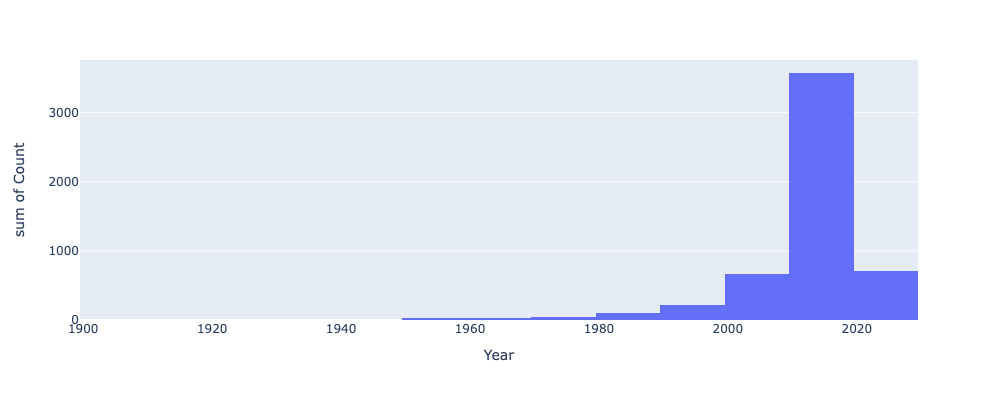

In [82]:
#Plot per year releases
df_age=df['Year'].value_counts()
df_age_v2=pd.DataFrame({'Year':df_age.index,'Count':df_age.values})
#Plot per year releases by age and platform


fig = px.histogram(df_age_v2, 
                   x="Year", 
                   y="Count",
                   barmode='group',
                   height=400
                  )
fig.show()


In [83]:
#Is there any pattern of Age group and titles present on each platform
for a in ('Netflix','Prime Video','Hulu','Disney+'):
    print ('Platform: ' + str(a)) 
    display( df[df[a]==1]['Age'].value_counts())

Platform: Netflix


18+    482
16+    384
7+     299
all    176
13+      3
Name: Age, dtype: int64

Platform: Prime Video


7+     213
16+    208
all    173
18+    164
13+      2
Name: Age, dtype: int64

Platform: Hulu


16+    501
7+     325
18+    261
all    124
13+      6
Name: Age, dtype: int64

Platform: Disney+


all    129
7+     109
16+     21
18+      2
Name: Age, dtype: int64

In [84]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


In [143]:
#Try to plot the data above as a bar graph. For this we need the platform transposed as rows. So trying some data manipulation logic to have PLatform as a row. Since we have duplicates i.e a title can be on more than one streaming platform, doing it this way
df_netflix=df[df['Netflix']==1].copy()
df_netflix['Platform']='Netflix'

In [144]:
df_amazon=df[df['Prime Video']==1].copy()
df_amazon['Platform']='Prime Video'

In [145]:
df_hulu=df[df['Hulu']==1].copy()
df_hulu['Platform']='Hulu'

In [146]:
df_disney=df[df['Disney+']==1].copy()
df_disney['Platform']='Disney+'

In [147]:
df_v2=pd.concat([df_netflix,df_amazon,df_hulu,df_disney])

In [161]:
df_v2.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Platform'],
      dtype='object')

In [148]:

df.count()

ID                 5368
Title              5368
Year               5368
Age                3241
IMDb               4406
Rotten Tomatoes    5368
Netflix            5368
Hulu               5368
Prime Video        5368
Disney+            5368
Platform           5368
dtype: int64

In [149]:
df_v2.count()

ID                 5774
Title              5774
Year               5774
Age                3582
IMDb               4790
Rotten Tomatoes    5774
Netflix            5774
Hulu               5774
Prime Video        5774
Disney+            5774
Platform           5774
dtype: int64

In [150]:
df_v2.count()-df.count()

ID                 406
Title              406
Year               406
Age                341
IMDb               384
Rotten Tomatoes    406
Netflix            406
Hulu               406
Prime Video        406
Disney+            406
Platform           406
dtype: int64

In [151]:
df[df['Netflix']+df['Prime Video']+df['Hulu']+df['Disney+']>1]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Platform
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,
5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0,
11,12,Community,2009,7+,8.5/10,90/100,1,1,1,0,
13,14,Shameless,2011,18+,8.5/10,90/100,1,1,1,0,
25,26,Fullmetal Alchemist: Brotherhood,2009,16+,9.1/10,88/100,1,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...
5064,5385,The Bad Batch,2021,7+,8.2/10,82/100,1,0,0,1,
5097,5425,The Muppets,2015,7+,7.4/10,64/100,1,0,0,1,
5231,5575,Pick of the Litter,2019,7+,8.1/10,47/100,1,1,0,1,
5247,5591,The Lodge,2016,NaN,6.2/10,46/100,0,1,0,1,


In [152]:
df_v2['Platform'].value_counts()

Netflix        1971
Prime Video    1831
Hulu           1621
Disney+         351
Name: Platform, dtype: int64

In [165]:
df_v2=df_v2.groupby(["Platform", "Age"]).size().reset_index(name='Count')

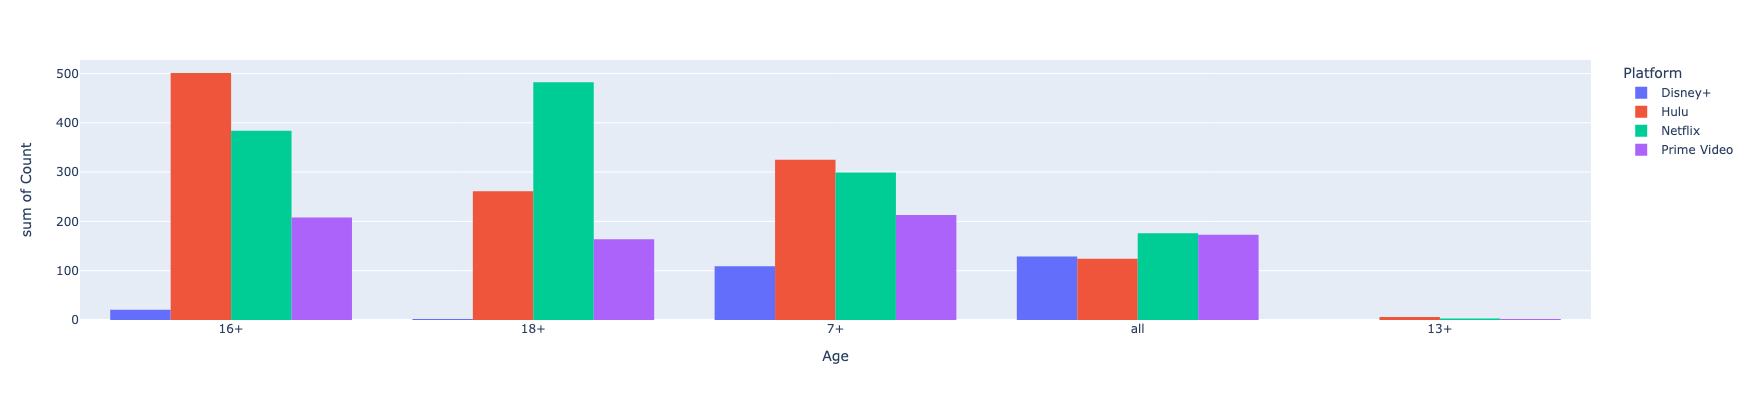

In [168]:
#Plot the above as a bar graph

fig = px.histogram(df_v2,x='Age',y='Count',color='Platform',barmode='group',height=400)
fig.show()